In [1]:
import numpy
print(numpy.__version__)
import networkx
print(networkx.__version__)

from nilmtk.api import API
import warnings

warnings.filterwarnings("ignore")
from nilmtk.disaggregate import DM_SDA, GaterSGN, SGN, DM_GATE2
import nilmtk.utils as utils

1.24.3
2.8.4


In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
# import pytorch_lightning as pl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# from src import *

USE_GPU = True
device = torch.device("cuda:0" if USE_GPU and torch.cuda.is_available() else "cpu")
print(torch.__version__, device)

2.0.1 cuda:0


DM_GATE2
Started training for  DM_GATE2
Joint training for  DM_GATE2
............... Loading Data for training ...................
Loading data for  ukdale  dataset
Loading building ...  1
{'fill_method': None, 'how': 'mean'}
{'fill_method': None, 'how': 'mean'}
Dropping missing values
Train Jointly
Loading building ...  5
{'fill_method': None, 'how': 'mean'}
{'fill_method': None, 'how': 'mean'}
Dropping missing values
Train Jointly
Doing Preprocessing
Train df <class 'list'>
Train main (9275040, 1)


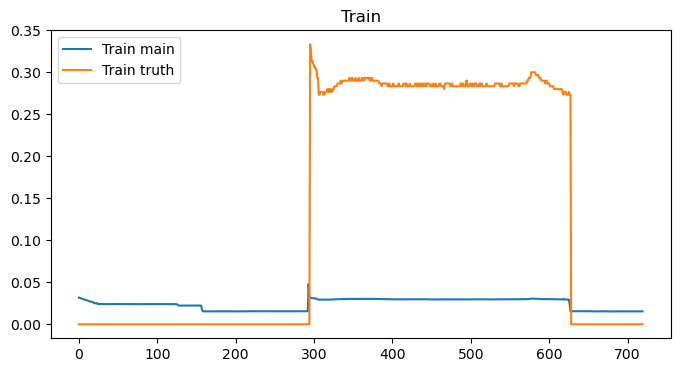

First model training for fridge
Is Time embed used ?  True
Unet dims: [2, 64, 128, 256, 512] [(2, 64), (64, 128), (128, 256), (256, 512)]
Cuda avail True GPU dataset True
Main shape (9275040, 1)
App shape (9275040, 1)
torch.Size([1, 7420032])
torch.Size([1, 1855008])
Seq len 720 stride 360 Train len 20609 Train batches 322


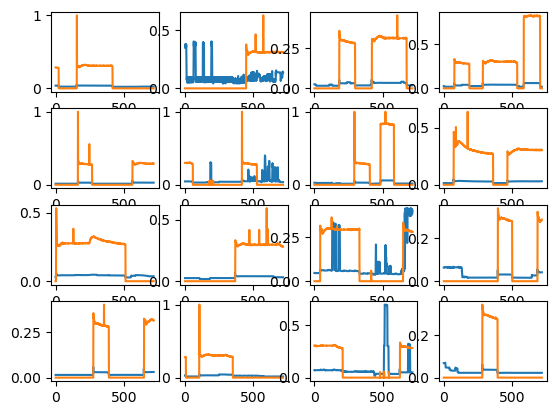

KeyboardInterrupt: 

In [3]:
e = {
    # Specify power type, sample rate and disaggregated appliance
    'power': {
        'mains': ['active'],
        # 'appliance': ['active']
        # 'mains': ['apparent'],  # problem: ukdale active, redd apparent
        'appliance': ['active']
    },
    'sample_rate': 6,
    'appliances': ['fridge'],
    # 'appliances': ['fridge'],
    # 'appliances': ['washing machine'],
    # Universally no pre-training
    'pre_trained': False,
    "app_meta": utils.APP_META["ukdale"],
    # Specify algorithm hyper-parameters
    # 'gater': 
    #     # "GaterSGN": GaterSGN(
    #     # {'n_epochs': 10, 'batch_size': 256, 'test_only': False}),
    #     SGN({'n_epochs': 5, 'batch_size': 256, 'test_only': True, 'gate_only': True, 'note': 'ukdale'})
    #     ,
    'methods': {
        "DM_GATE2": DM_GATE2(
            {'n_epochs': 1, 'batch_size': 64, 'sequence_length': 720, 'overlapping_step': 360,
            'test_only': False, 'fine_tune': False, 'src_rate': 0.5, 'lr': 3e-5, "sampler": "ddim",
            "app_meta": utils.APP_META["ukdale"], 'filter_train': False, 'note': 'ukdale'})
         },
    # Specify train and test data
    'train': {
        'datasets': {
            'ukdale': {
                'path': 'mnt/ukdale.h5',
                'buildings': {
                    1: {
                        'start_time': '2013-05-31',
                        'end_time': '2014-12-31'
                    },
                    # 2: {
                    #     'start_time': '2013-05-22',
                    #     'end_time': '2013-08-01'
                    # },
                    5: {
                        'start_time': '2014-07-01',
                        'end_time': '2014-09-05'
                    },
                }
            },
        }
    },
    # 'transfer': {
    #     'datasets': {
    #         'redd': {
    #             'path': 'mnt/redd.h5',
    #             'buildings': {
    #                 # 1: {
    #                 #     'start_time': '2011-04-19',
    #                 #     'end_time': '2011-05-04'
    #                 # }
    #                 2: {
    #                     'start_time': '2011-04-18',
    #                     'end_time': '2011-04-25'
    #                 }
    #             }
    #         },
    #         # 'ukdale': {
    #         #   'path': 'mnt/ukdale.h5',
    #         #   'buildings': {
    #         #         1: {
    #         #               'start_time': '2013-05-01 00:00',
    #         #               'end_time': '2013-05-14 00:00'
    #         #         }
    #         #     }
    #         #   },
    #     },
    # },
    'test': {
        'datasets': {
            'ukdale': {
              'path': 'mnt/ukdale.h5',
              'buildings': {
                    2: {
                          'start_time': '2013-05-25 18:00',
                        #   'end_time': '2013-05-27 00:00'
                          'end_time': '2013-09-30 00:00'
                    },
                }
              },
            # 'redd': {
            #     'path': 'mnt/redd.h5',
            #     'buildings': {
            #         2: {
            #             'start_time': '2011-04-26',
            #             'end_time': '2011-04-30'
            #         }
            #     }
            #     # 'buildings': {
            #     #     2: {
            #     #         'start_time': '2011-05-05',
            #     #         'end_time': '2011-05-22'
            #     #     }
            #     # }
            # },
        },
        # Specify evaluation metrics
        'metrics': ['mae', 'accuracy', 'f1score', 'recall', 'precision', 'nep', 'MCC']
    }
}

API(e)